The aim of this exercise is to produce a 'quantum dice', i.e. a quantum state that, when measured, will produce all possible bit-strings with equal probability.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from pyquil import Program, get_qc
from pyquil.api import WavefunctionSimulator
from pyquil.gates import *

import numpy as np
import itertools

In [3]:
def quantum_dice(n):
    '''
    :param n: number of qubits
    :return: Program preparing quantum dice
    '''
    p = Program()
    for q in range(n):
        p += Program(H(q))
    return p

As an example, we'll pick an 8 sided dice.

In [4]:
n = 3  # since 2^3 = 8
p = quantum_dice(n)

Let's use the WavefunctionSimulator to investigate what the wavefunction would look like.

In [5]:
wfn_sim = WavefunctionSimulator()
wfn = wfn_sim.wavefunction(p)
outcome_probs = wfn.get_outcome_probs()

In [6]:
# testing for correctness of program
np.testing.assert_allclose(list(outcome_probs.values()), np.tile(1/(2**n), 2**n))
print("Quantum Dice implementation correct!")

Quantum Dice implementation correct!


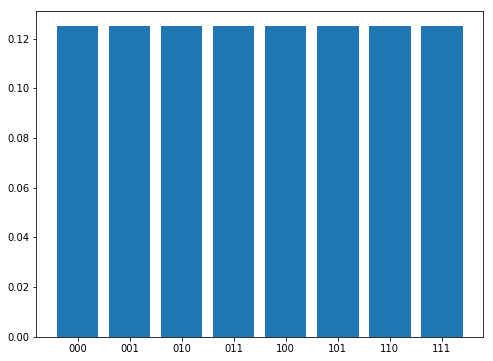

In [7]:
# Plotting probabilities according to the resultant wavefunction
plt.figure(figsize=(8, 6))
plt.bar(outcome_probs.keys(), outcome_probs.values())
plt.show()

We can also run against a (simulated) Quantum Computer to measure out the state many times, and plot the resulting values.

In [8]:
# specify the number of trials/shots
n_shots = 1000

In [9]:
qc = get_qc('9q-generic-qvm')
results = qc.run_and_measure(p, trials=n_shots)
results_stack = np.column_stack(tuple([results[i] for i in range(n)]))

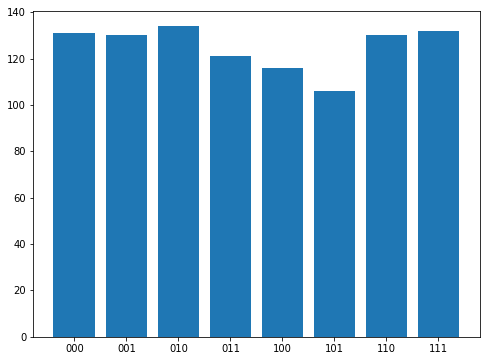

In [10]:
# plot frequency bars
d_counts = {''.join(q): np.sum(np.all(results_stack == np.array([int(s) for s in q]), axis=-1))
            for q in itertools.product(['0', '1'], repeat=n)}

plt.figure(figsize=(8, 6))
plt.bar(d_counts.keys(), d_counts.values())
plt.show()